In [ ]:
!pip install geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
import time
import matplotlib.pyplot as plt
import cv2
from osgeo import gdal
import numpy as np
import geopandas as gpd

In [ ]:
os.chdir("/content/drive/MyDrive/AI for Trees Share/01. Data")

In [ ]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1Sc5M0qGrOAgKFD9NkeAkc9BYUn7TJjwM/AI for Trees Share/01. Data'

2021/img/ZK17.tif


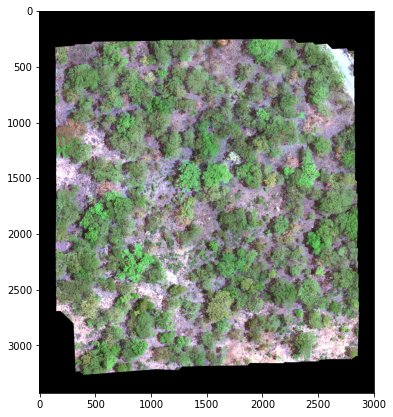

In [ ]:
img_path = '2021/img/ZK17.tif'
print(img_path)
img_array = cv2.imread(img_path)
plt.figure(figsize=(6,8))
plt.imshow(img_array)

In [ ]:
gdal_img=gdal.Open('2021/img/ZK17.tif')
print(gdal_img.RasterCount)  

4


In [ ]:
gdal_img.GetProjection() 

'PROJCS["WGS 84 / UTM zone 35S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",27],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32735"]]'

In [ ]:
gdal_img.GetGeoTransform()

(387115.1487,
 0.055381724367495014,
 0.0,
 8288917.8458,
 0.0,
 -0.05538172262781946)

In [ ]:
gdal_img.GetMetadata()

{'AREA_OR_POINT': 'Area'}

In [ ]:
band_1 = gdal_img.GetRasterBand(1) # red channel  
band_2 = gdal_img.GetRasterBand(2) # green channel  
band_3 = gdal_img.GetRasterBand(3) # blue channel  

In [ ]:
b1 = band_1.ReadAsArray()  
b2 = band_2.ReadAsArray()  
b3 = band_3.ReadAsArray()  

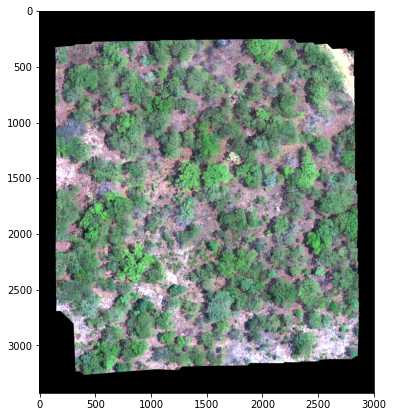

In [ ]:
img_1 = np.dstack((b1, b2, b3))  
plt.figure(figsize=(6,8))
plt.imshow(img_1)

In [ ]:
#shape fi

In [ ]:
shp_path="2021/shp"
imgs=os.listdir(shp_path)

In [ ]:
count=0
for i in imgs:
  os.chdir("/content/drive/MyDrive/AI for Trees Share/01. Data/2021/shp/"+i)
  gdf = gpd.read_file(i+".shp")
  count=count+len(gdf)
print(count)

633


In [ ]:
# 633 Annotated trees in 2021

In [ ]:
os.chdir("/content/drive/MyDrive/AI for Trees Share/01. Data")

In [ ]:
count=0
for i in os.listdir('2019/shp'):
  os.chdir("/content/drive/MyDrive/AI for Trees Share/01. Data/2019/shp/"+i)
  gdf = gpd.read_file(i+".shp")
  count=count+len(gdf)
print(count)

623


In [ ]:
#623 Annotated trees in 2019 